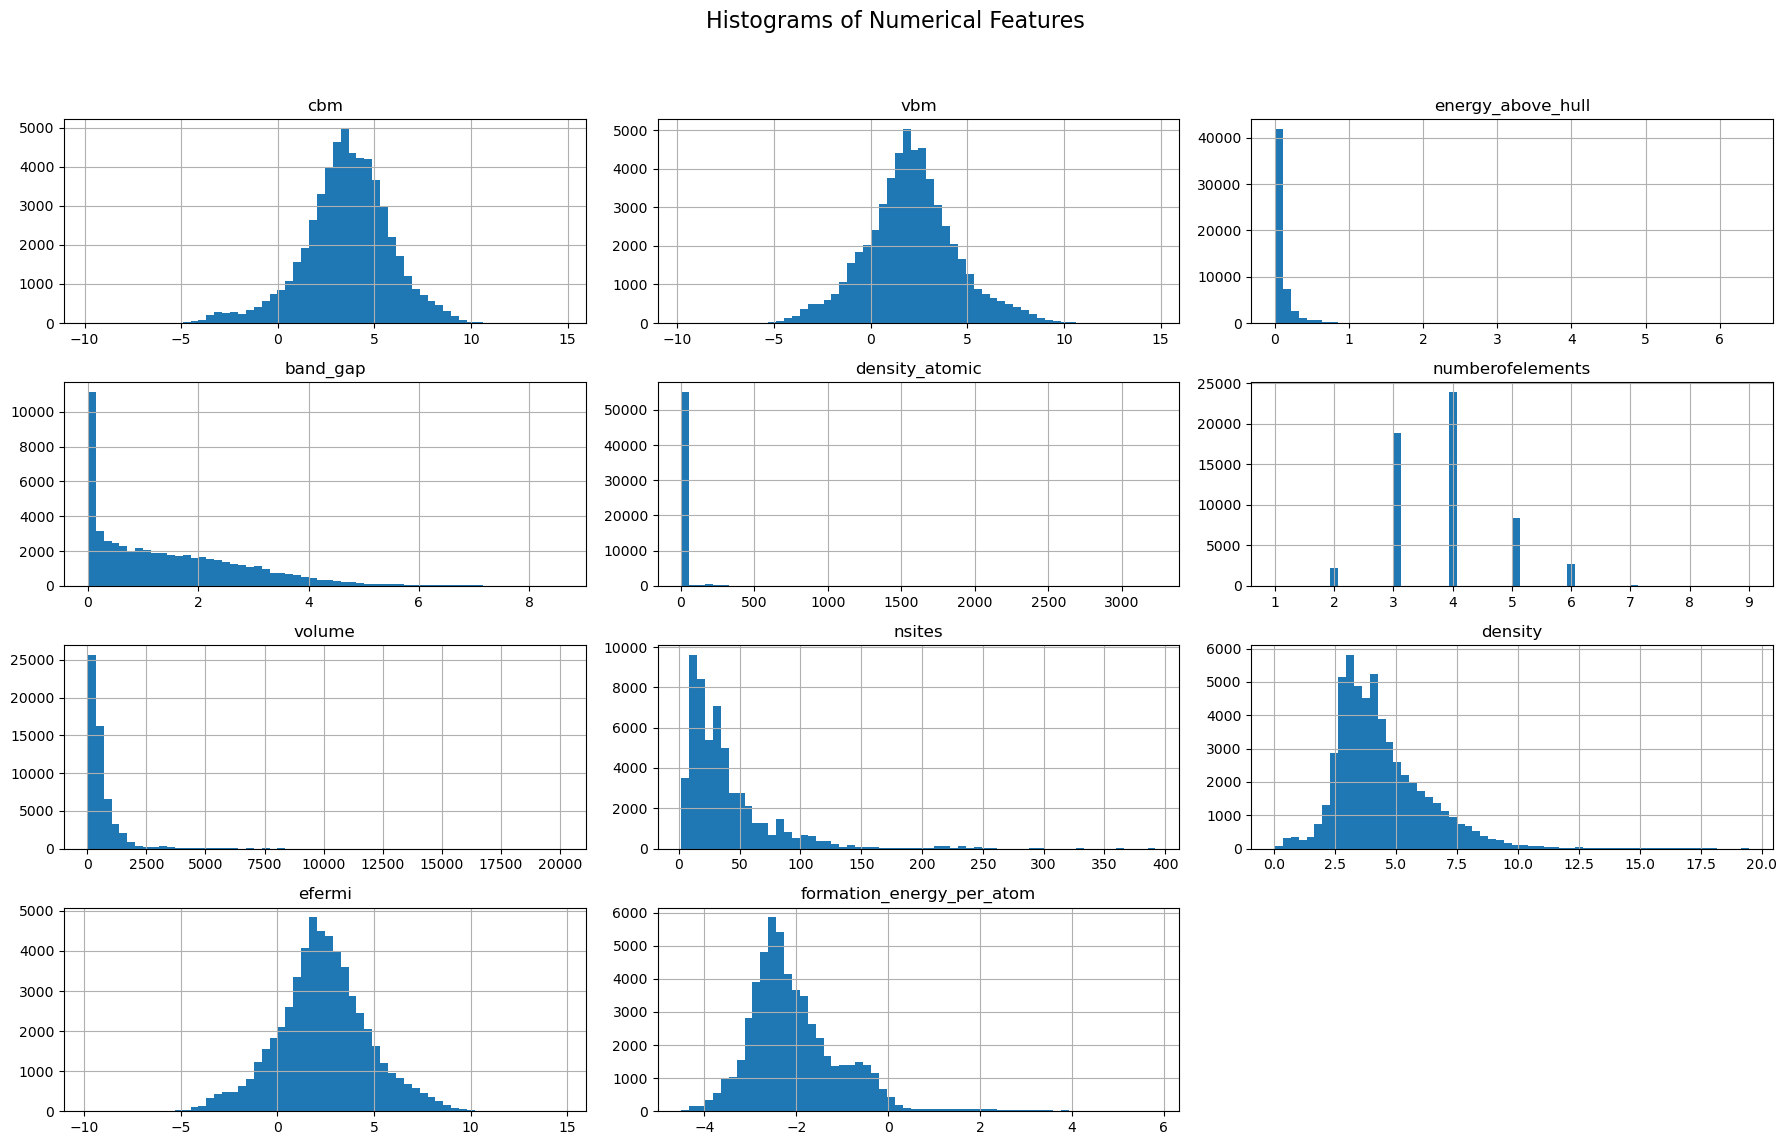

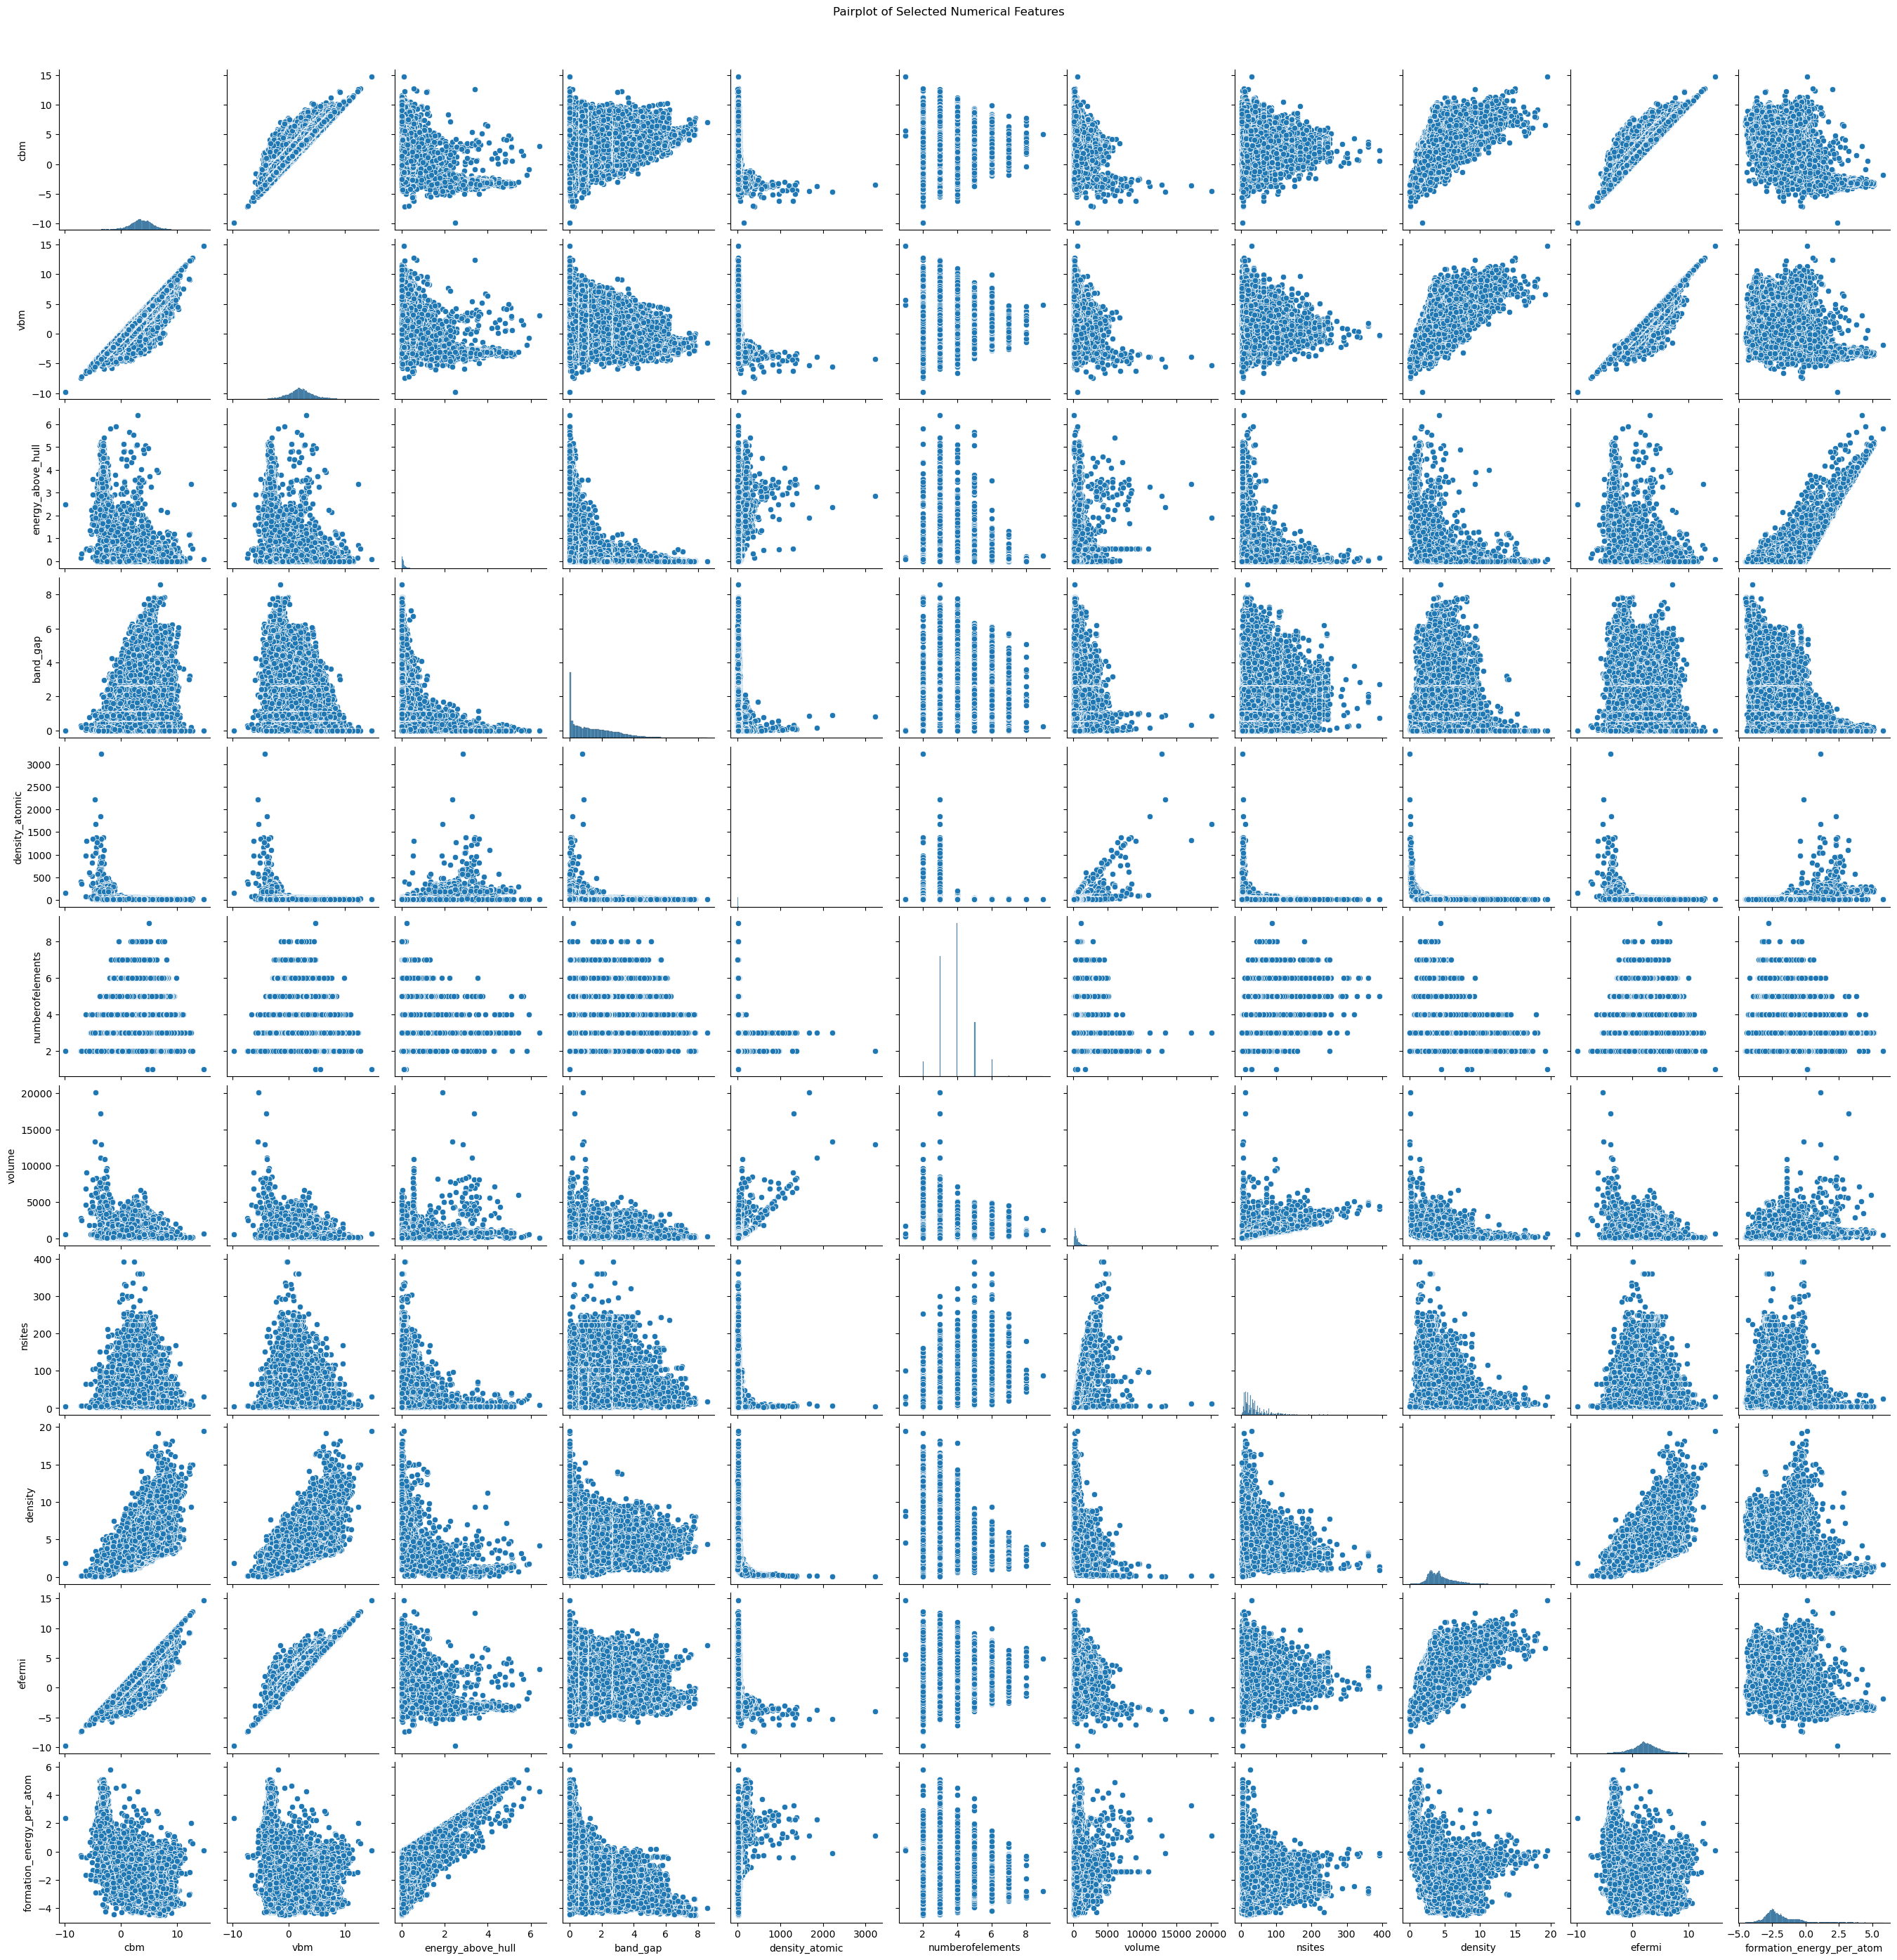

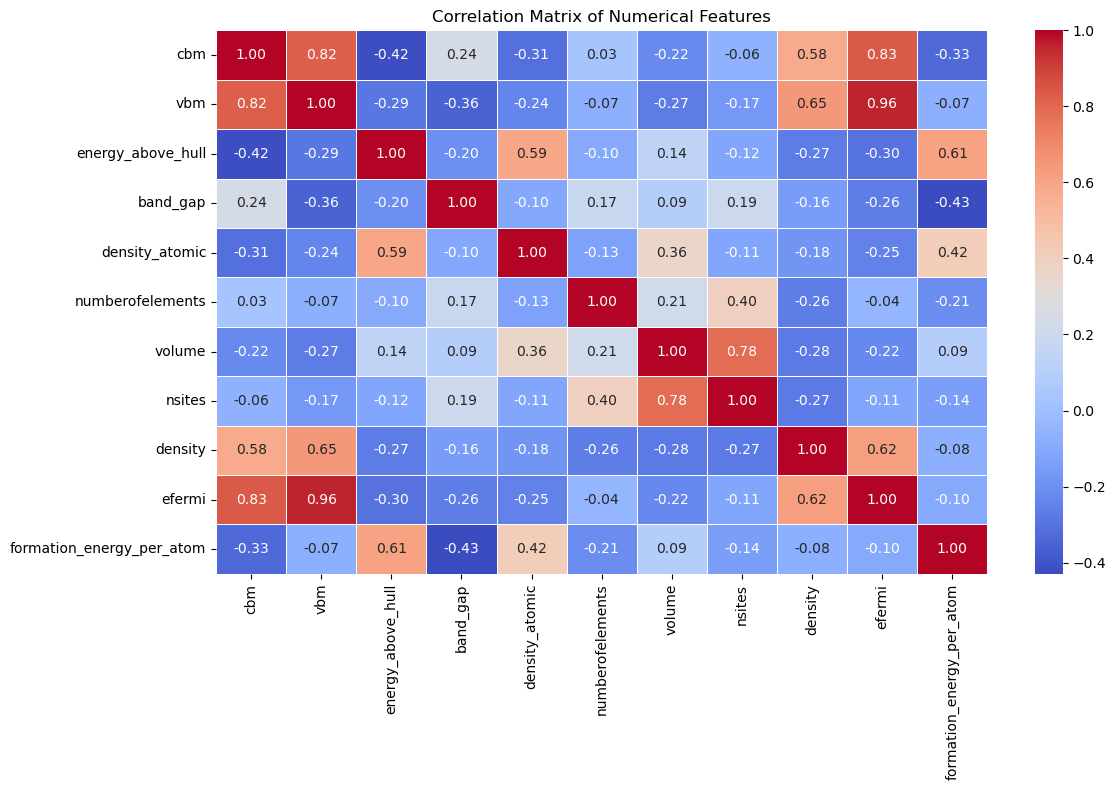

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# Select numerical features
numerical_features = [
    "cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
    "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"
]

# Drop rows with missing values in those features
df_num = df[numerical_features].dropna()

# Plot histograms for each numerical feature
df_num.hist(bins=60 , figsize=(18, 12), layout=(4, 3))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Pairplot for first few numerical features (to avoid overload)
sns.pairplot(df_num[numerical_features[:11]])
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


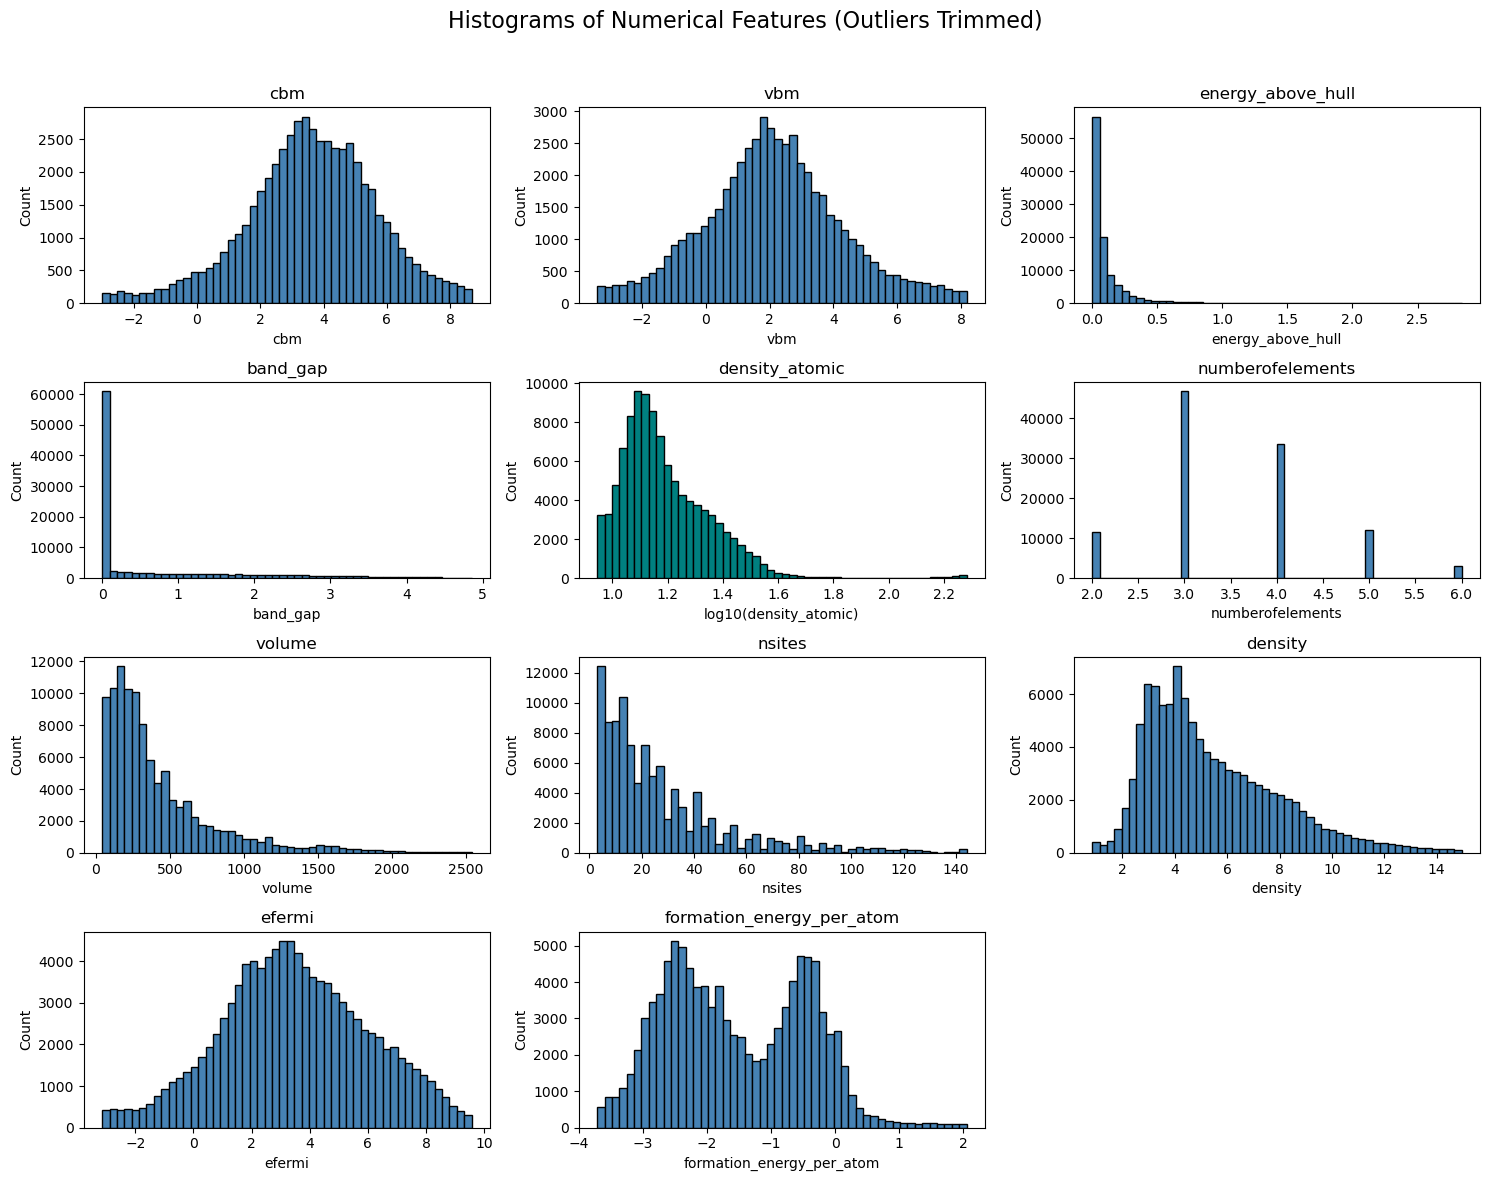

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# List of numerical features
features = ["cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
            "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"]

fig, axs = plt.subplots(4, 3, figsize=(15, 12))
axs = axs.flatten()

for i, feature in enumerate(features):
    data = df[feature].dropna()

    # Apply log scale only to density_atomic
    if feature == "density_atomic":
        data = data[data > 0]
        data_log = np.log10(data)
        low, high = np.percentile(data_log, [1, 99])
        axs[i].hist(data_log, bins=50, color="teal", edgecolor="black", range=(low, high))
        axs[i].set_xlabel("log10(density_atomic)")
    else:
        low, high = np.percentile(data, [1, 99])
        axs[i].hist(data, bins=50, color="steelblue", edgecolor="black", range=(low, high))
        axs[i].set_xlabel(feature)
    
    axs[i].set_ylabel("Count")
    axs[i].set_title(feature)

# Hide unused subplot if any
for j in range(len(features), len(axs)):
    axs[j].axis("off")

fig.suptitle("Histograms of Numerical Features (Outliers Trimmed)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


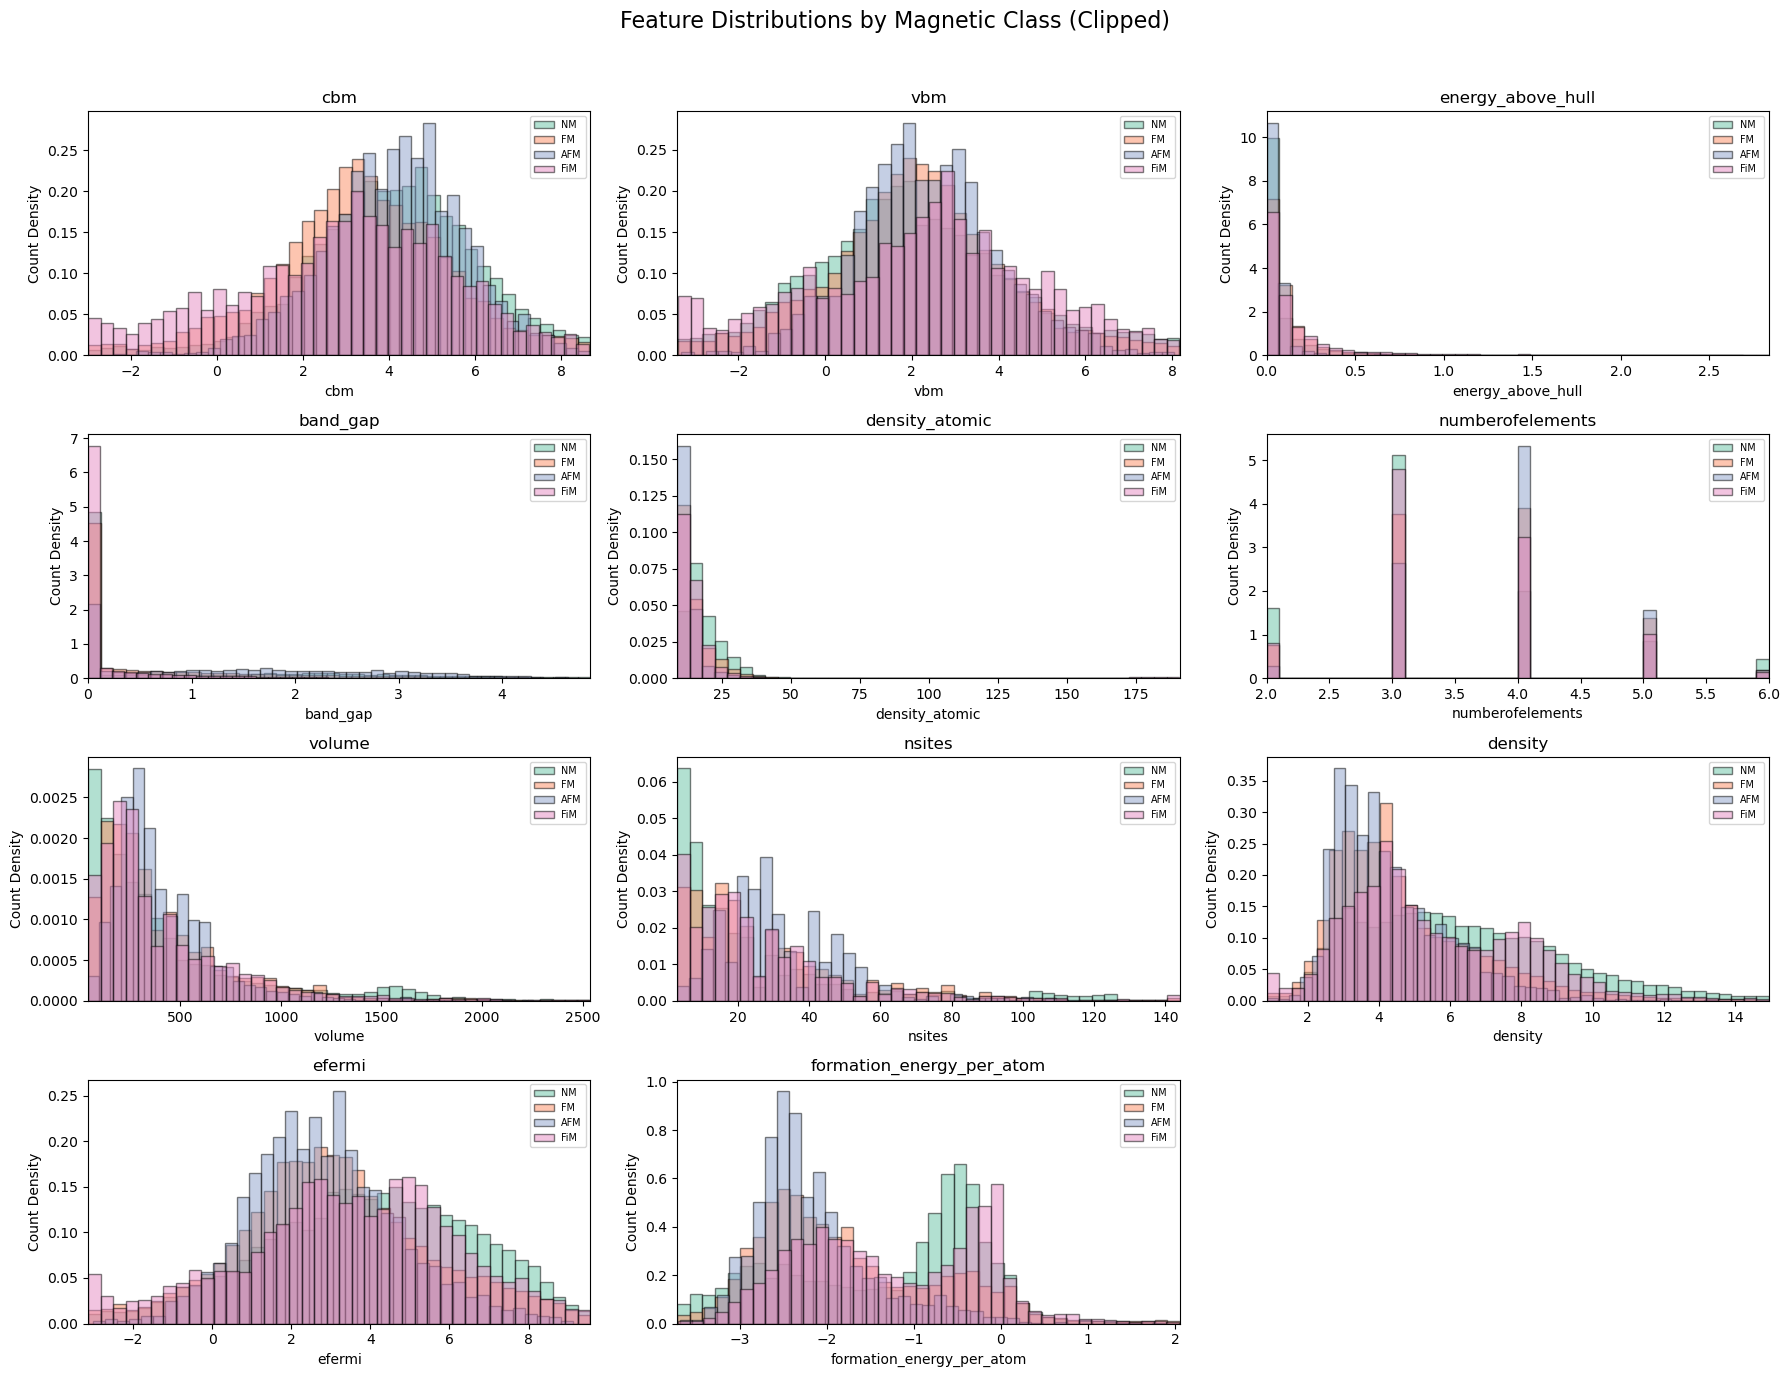

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Numerical features
features = ["cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
            "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"]

classes = df["ordering"].unique()
colors = sns.color_palette("Set2", len(classes))  # One color per class

ncols = 3
nrows = int(np.ceil(len(features) / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(18, 14))
axs = axs.flatten()

for i, feature in enumerate(features):
    ax = axs[i]

    # Compute tight x-axis limits based on all data (1st to 99th percentile)
    full_data = df[feature].dropna()
    xmin, xmax = np.percentile(full_data, [1, 99])
    
    for cls, color in zip(classes, colors):
        subset = df[df["ordering"] == cls][feature].dropna()
        clipped = subset[(subset >= xmin) & (subset <= xmax)]

        ax.hist(clipped, bins=40, alpha=0.5, label=cls, color=color, edgecolor="black", density=True)

    ax.set_xlim(xmin, xmax)
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count Density")
    ax.legend(fontsize="x-small")

# Hide unused subplots
for j in range(len(features), len(axs)):
    axs[j].axis("off")

plt.suptitle("Feature Distributions by Magnetic Class (Clipped)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


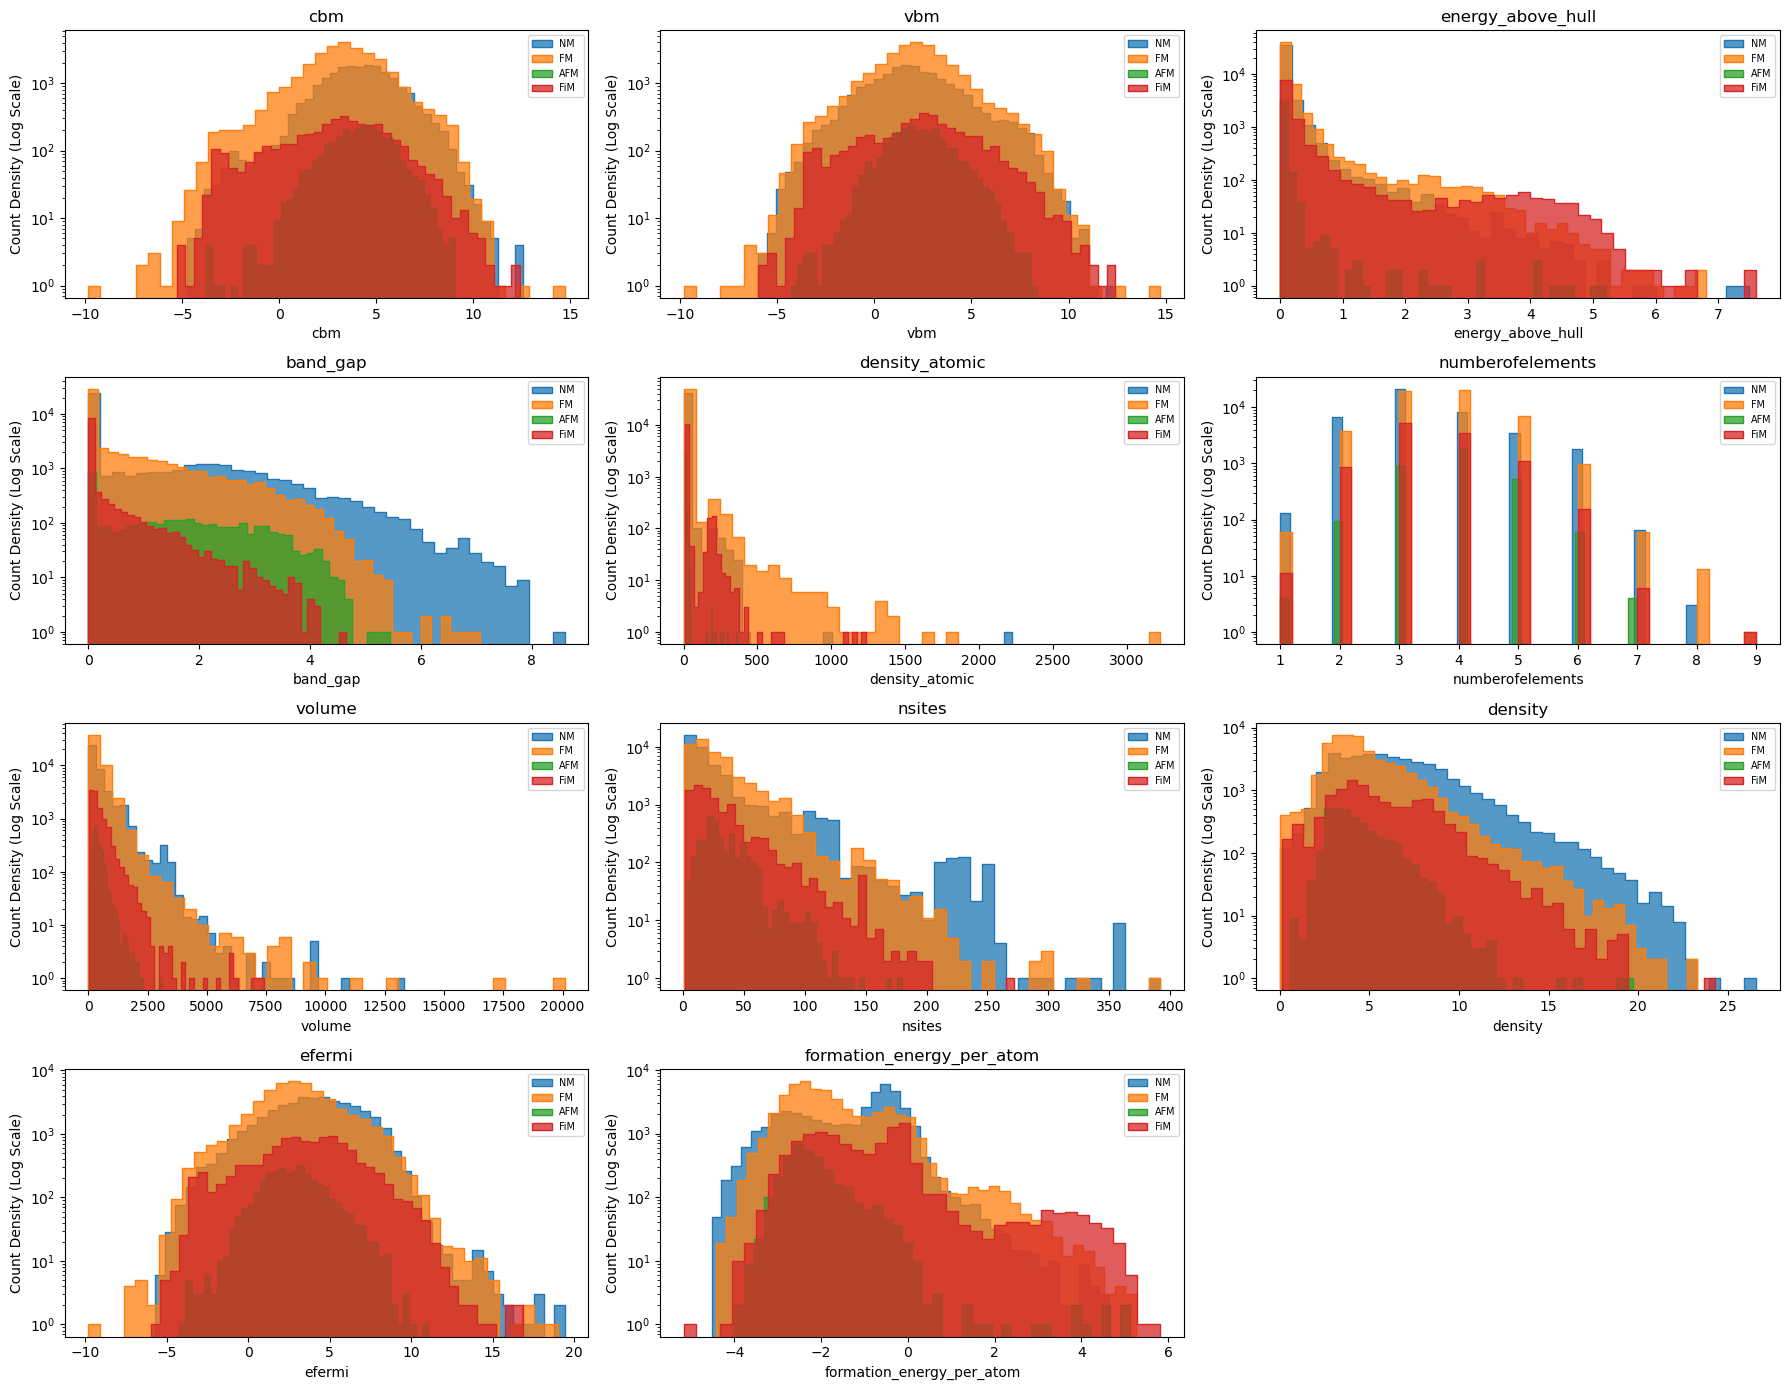

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

features = ["cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
            "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"]
classes = df["ordering"].unique()

ncols = 3
nrows = int(np.ceil(len(features) / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(18, 14))
axs = axs.flatten()

for i, feature in enumerate(features):
    ax = axs[i]
    for cls in classes:
        vals = df[df["ordering"] == cls][feature].dropna()
        sns.histplot(vals, bins=40, element="step", label=cls, ax=ax, log_scale=(False, True))
    ax.set_title(feature)
    ax.legend(fontsize="x-small")

for j in range(len(features), len(axs)):
    axs[j].axis("off")

  
for ax in axs:
    ax.set_ylabel("Count Density (Log Scale)")
    ax.set_yscale("log")
plt.tight_layout()
plt.show()


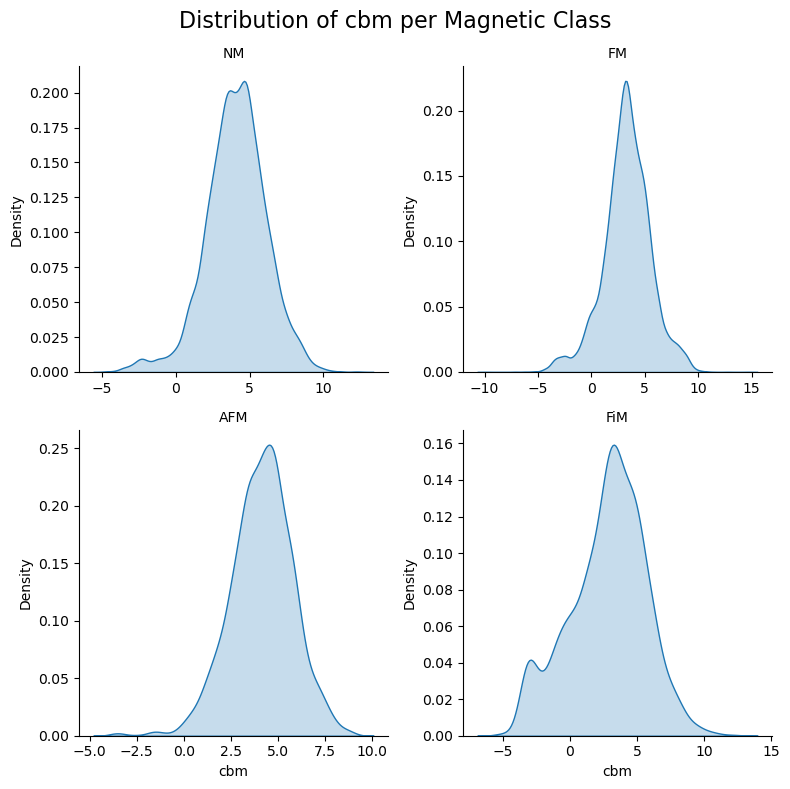

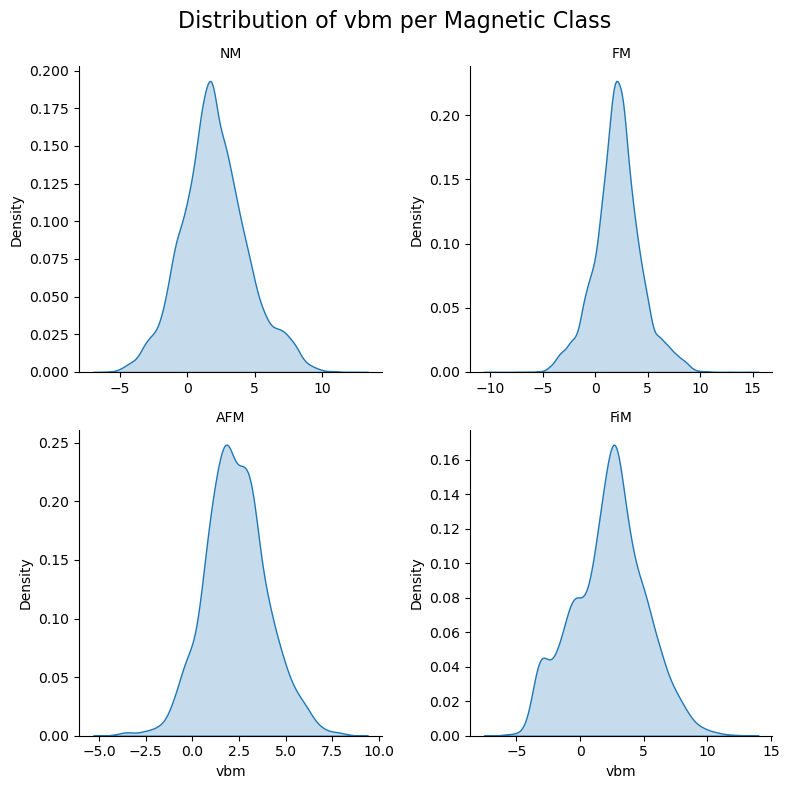

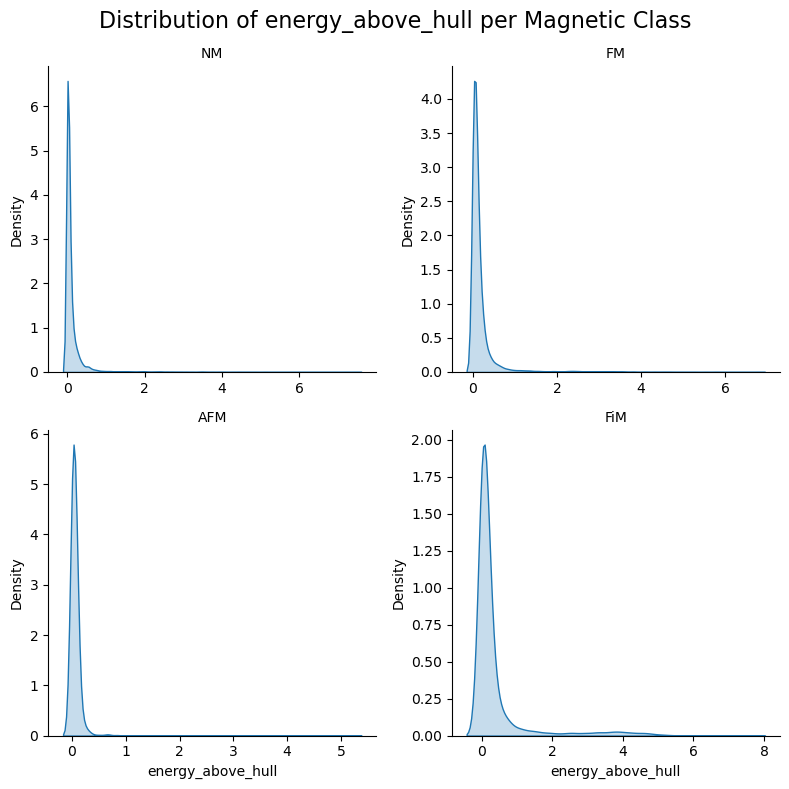

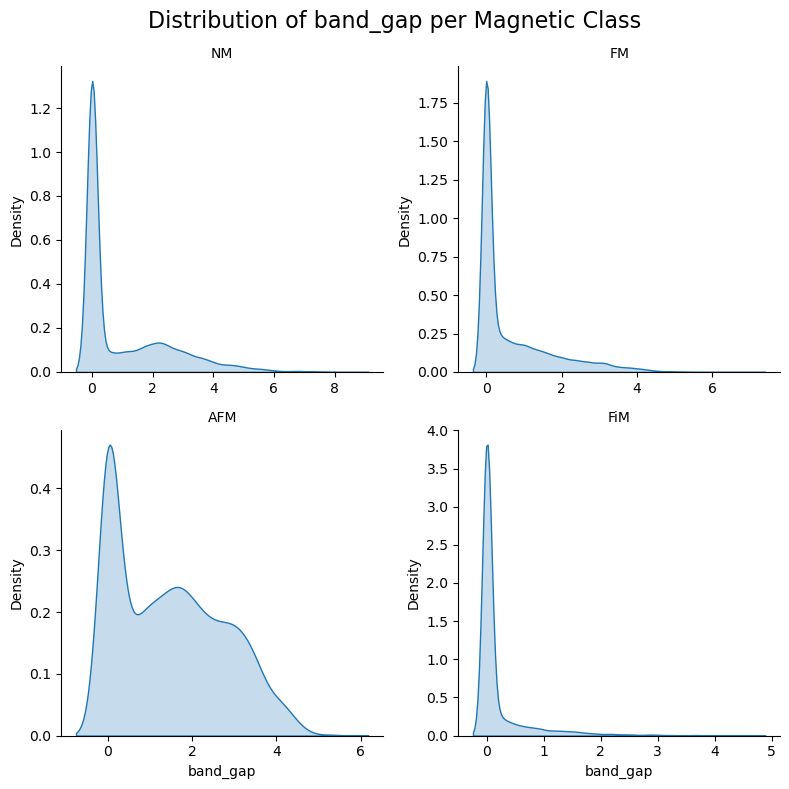

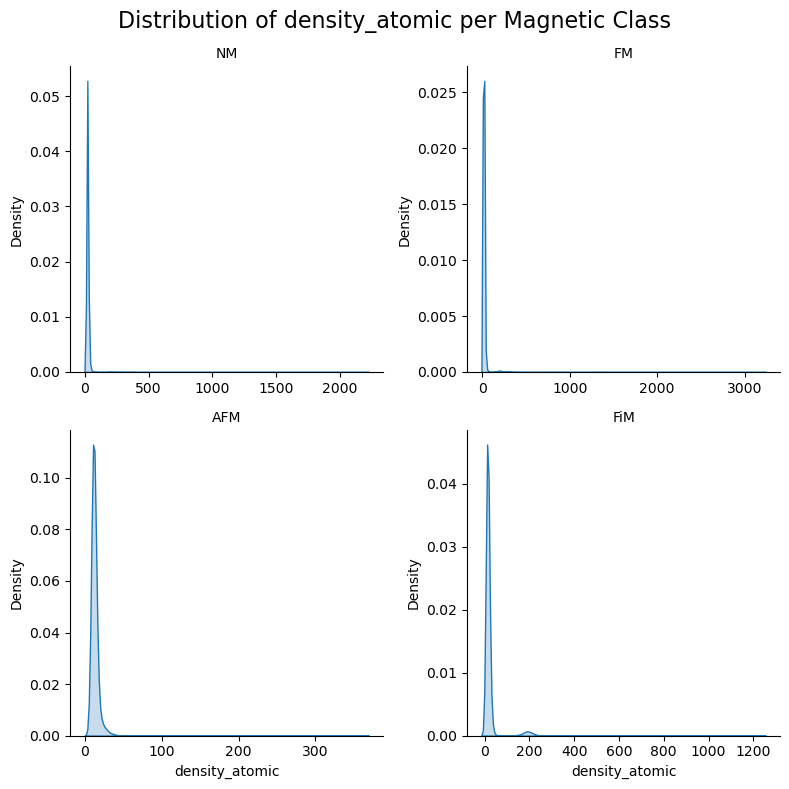

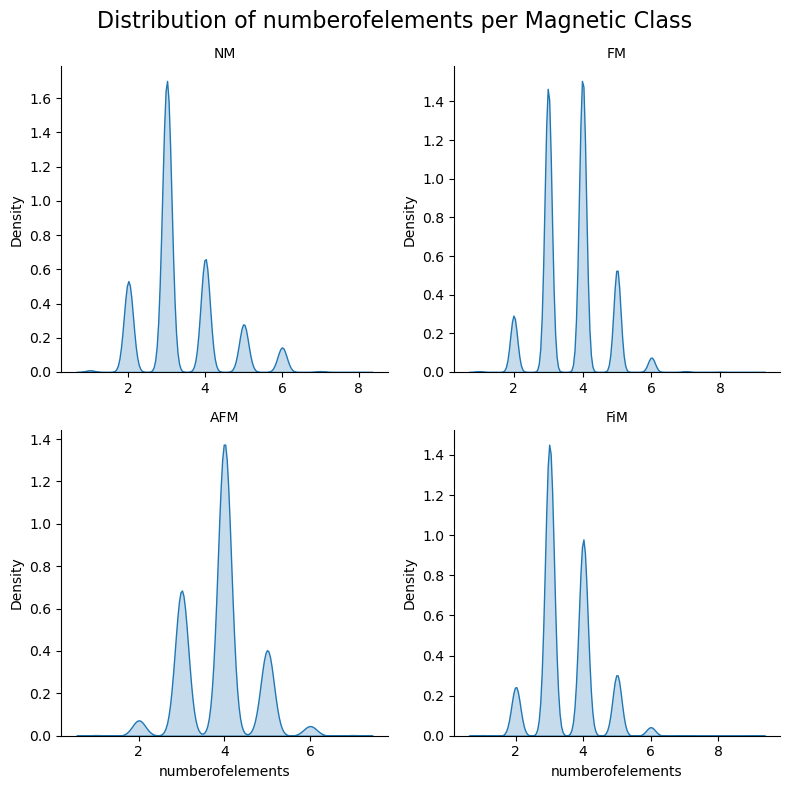

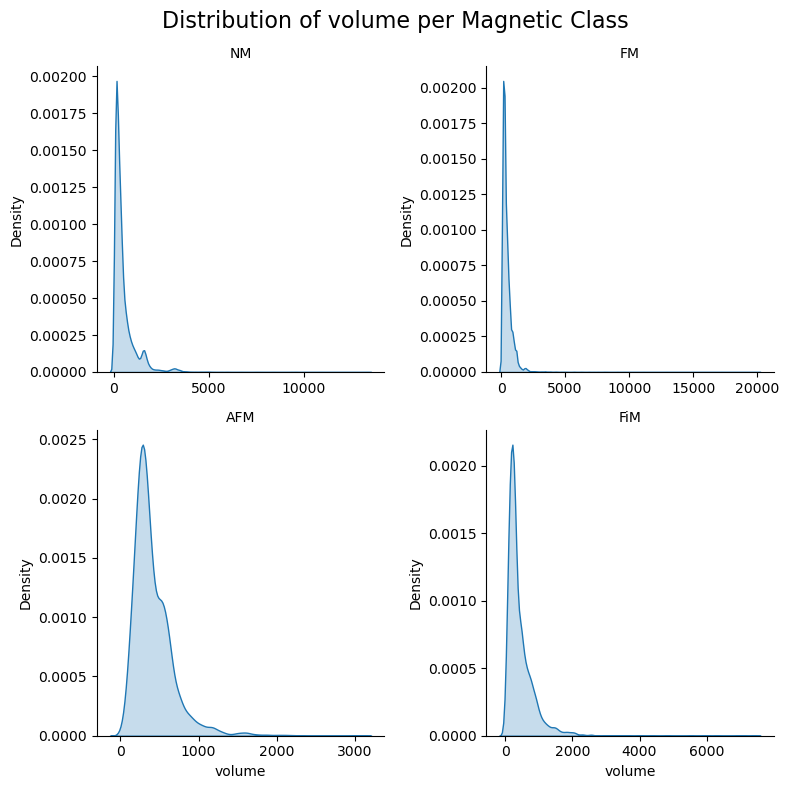

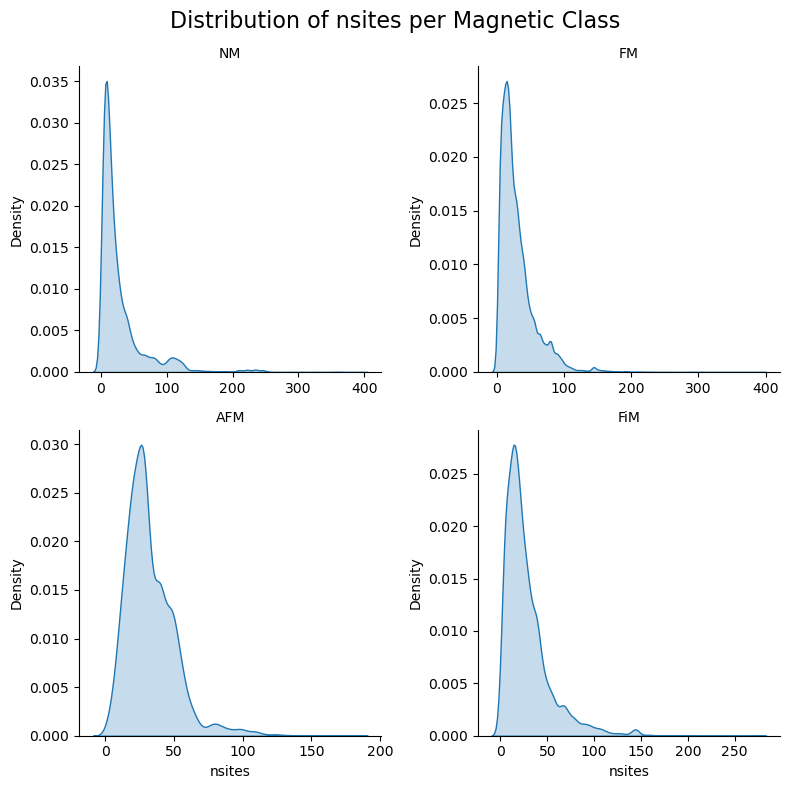

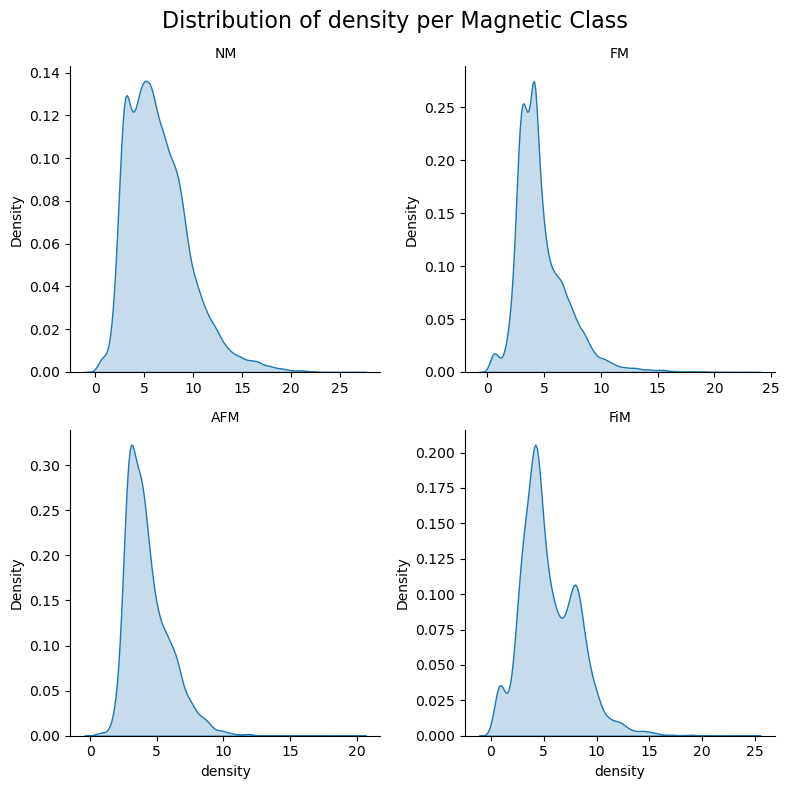

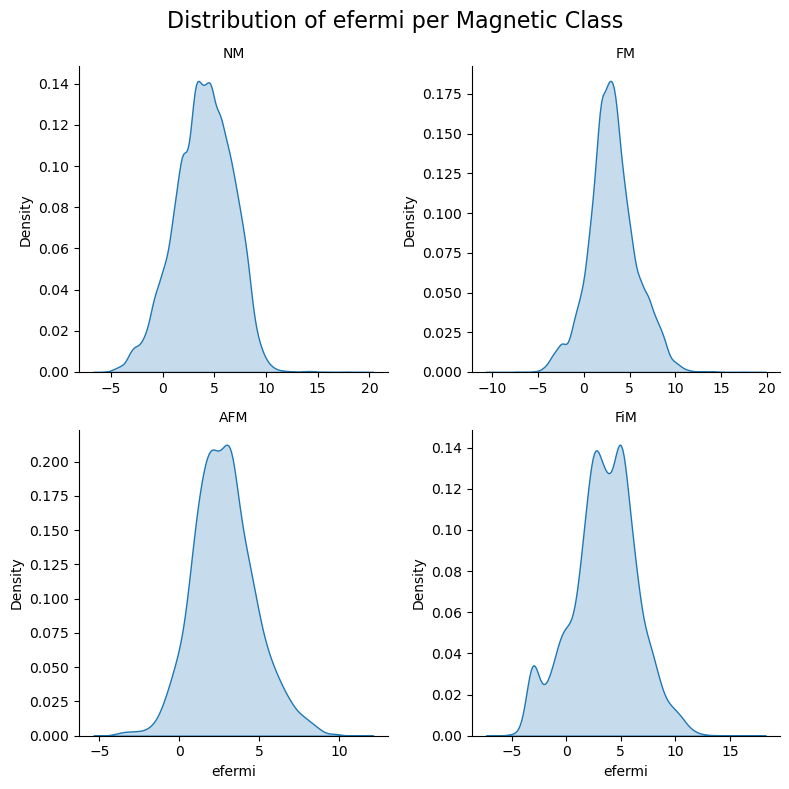

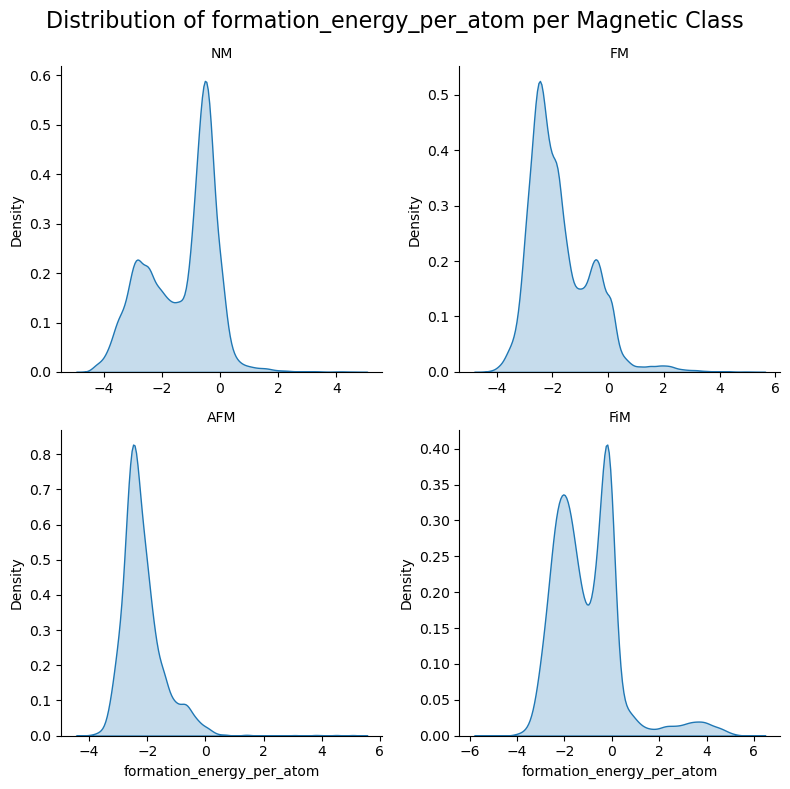

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
            "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"]

for feature in features:
    g = sns.FacetGrid(df, col="ordering", col_wrap=2, height=4, sharex=False, sharey=False)
    g.map(sns.kdeplot, feature, fill=True)
    g.set_titles(col_template="{col_name}")
    plt.suptitle(f"Distribution of {feature} per Magnetic Class", fontsize=16)
    plt.tight_layout()
    plt.show()


In [17]:
df.shape  # number of materials with at least one magnetic element

(107183, 22)